<a href="https://colab.research.google.com/github/omidr1348/Spotify-Analysis-Dataset-2025/blob/main/Spotify_Analysis_Dataset_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"omidrahmanzadeh","key":"773ade4c3f6f4ef787e5e5d05213a6c3"}'}

In [ ]:
import os

# Make directory for Kaggle API key
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json to the proper location
!mv kaggle.json /root/.kaggle/kaggle.json

# Set correct permissions
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download nabihazahid/spotify-dataset-for-churn-analysis

Dataset URL: https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis
License(s): apache-2.0
  0% 0.00/96.8k [00:00<?, ?B/s]
100% 96.8k/96.8k [00:00<00:00, 313MB/s]


In [ ]:
!unzip spotify-dataset-for-churn-analysis.zip

Archive:  spotify-dataset-for-churn-analysis.zip
  inflating: spotify_churn_dataset.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('spotify_churn_dataset.csv')
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [ ]:
df['country'].value_counts()

,count
country,
AU,1034
US,1032
DE,1015
IN,1011
PK,999
FR,989
UK,966
CA,954


In [ ]:
gender_subscription_group = df.groupby(['gender', 'subscription_type']).size().unstack(fill_value=0)
display(gender_subscription_group)

subscription_type,Family,Free,Premium,Student
gender,,,,
Female,604,687,701,667
Male,657,659,725,650
Other,647,672,689,642


In [ ]:
country_subscription_group = df.groupby(['country', 'subscription_type']).size()
display(gender_subscription_group)

subscription_type,Family,Free,Premium,Student
gender,,,,
Female,604,687,701,667
Male,657,659,725,650
Other,647,672,689,642


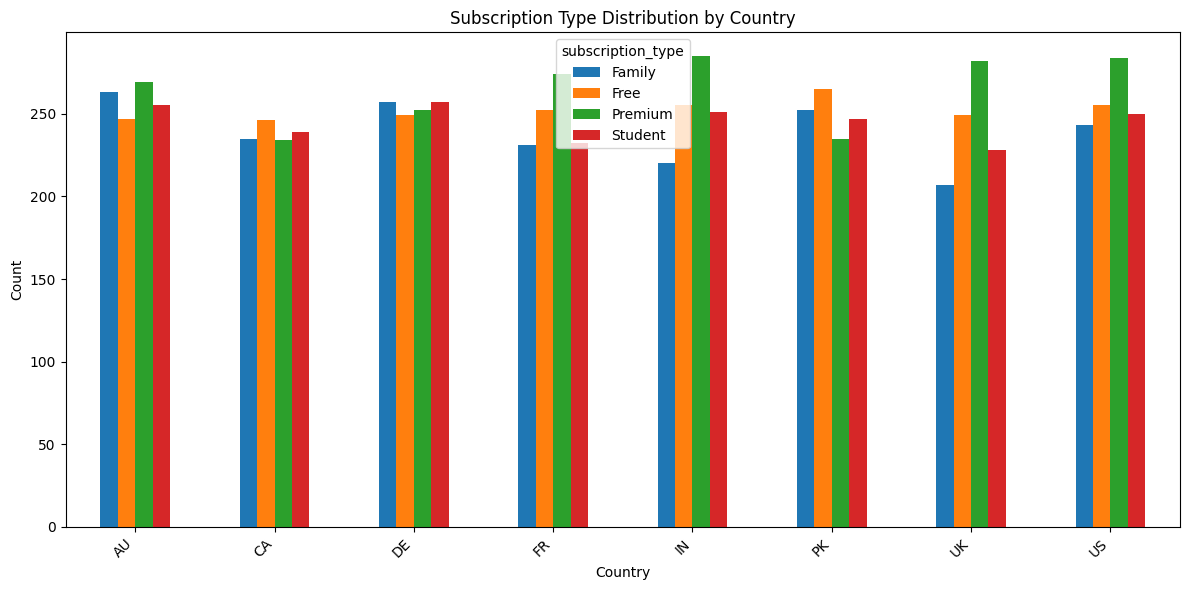

In [ ]:
country_subscription_group.unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Subscription Type Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
if 'age' in df.columns:
    df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60], labels=["teenager", 'young', 'middle_age', "old"])

In [ ]:
mean_listening_time_per_age_group = df.groupby('age_group')['listening_time'].sum()
display(mean_listening_time_per_age_group)

/tmp/ipython-input-1204193963.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_listening_time_per_age_group = df.groupby('age_group')['listening_time'].sum()


,listening_time
age_group,
teenager,83927
young,334078
middle_age,410927
old,403614


In [ ]:
sum_is_churned_per_age_group = df.groupby(['is_churned','age_group']).size()
display(sum_is_churned_per_age_group)

/tmp/ipython-input-2244440498.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_is_churned_per_age_group = df.groupby(['is_churned','age_group']).size()


is_churned  age_group 
0           teenager       396
            young         1590
            middle_age    2001
            old           1942
1           teenager       138
            young          546
            middle_age     707
            old            680
dtype: int64

In [ ]:
songs_played_per_day_per_age_group = df.groupby('age_group')['songs_played_per_day'].sum()
display(songs_played_per_day_per_age_group)

/tmp/ipython-input-947164789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  songs_played_per_day_per_age_group = df.groupby('age_group')['songs_played_per_day'].sum()


,songs_played_per_day
age_group,
teenager,26995
young,107108
middle_age,136421
old,130494


In [ ]:
df['age_group'].value_counts()

,count
age_group,
middle_age,2708
old,2622
young,2136
teenager,534


In [ ]:
age_group_subscription_group = df.groupby(['age_group', 'subscription_type']).size().unstack()
age_group_subscription_group_percentage = age_group_subscription_group.divide(age_group_subscription_group.sum(axis=1), axis=0) * 100
display(age_group_subscription_group_percentage)

/tmp/ipython-input-4054042705.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_subscription_group = df.groupby(['age_group', 'subscription_type']).size().unstack()


subscription_type,Family,Free,Premium,Student
age_group,,,,
teenager,20.786517,27.715356,25.280899,26.217228
young,23.408240,25.936330,27.059925,23.595506
middle_age,23.929099,24.926145,26.514032,24.630724
old,24.752098,24.446987,26.086957,24.713959


In [ ]:
df.values[0]

array([1, 'Female', 54, 'CA', 'Free', 26, 23, 0.2, 'Desktop', 31, 0, 1,
       'old'], dtype=object)

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original
df_mapped = df.copy()

# Map categorical features to numerical values
for column in ['gender', 'country', 'subscription_type', 'device_type', 'age_group']:
    df_mapped[column] = df_mapped[column].astype('category').cat.codes

display(df_mapped.head())

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,age_group
0,1,0,54,1,1,26,23,0.20,0,31,0,1,3
1,2,2,33,2,0,141,62,0.34,2,0,1,0,2
2,3,1,38,0,2,199,38,0.04,1,0,1,1,2
3,4,0,22,1,3,36,2,0.31,1,0,1,0,1
4,5,2,29,7,0,250,57,0.36,1,0,1,1,1


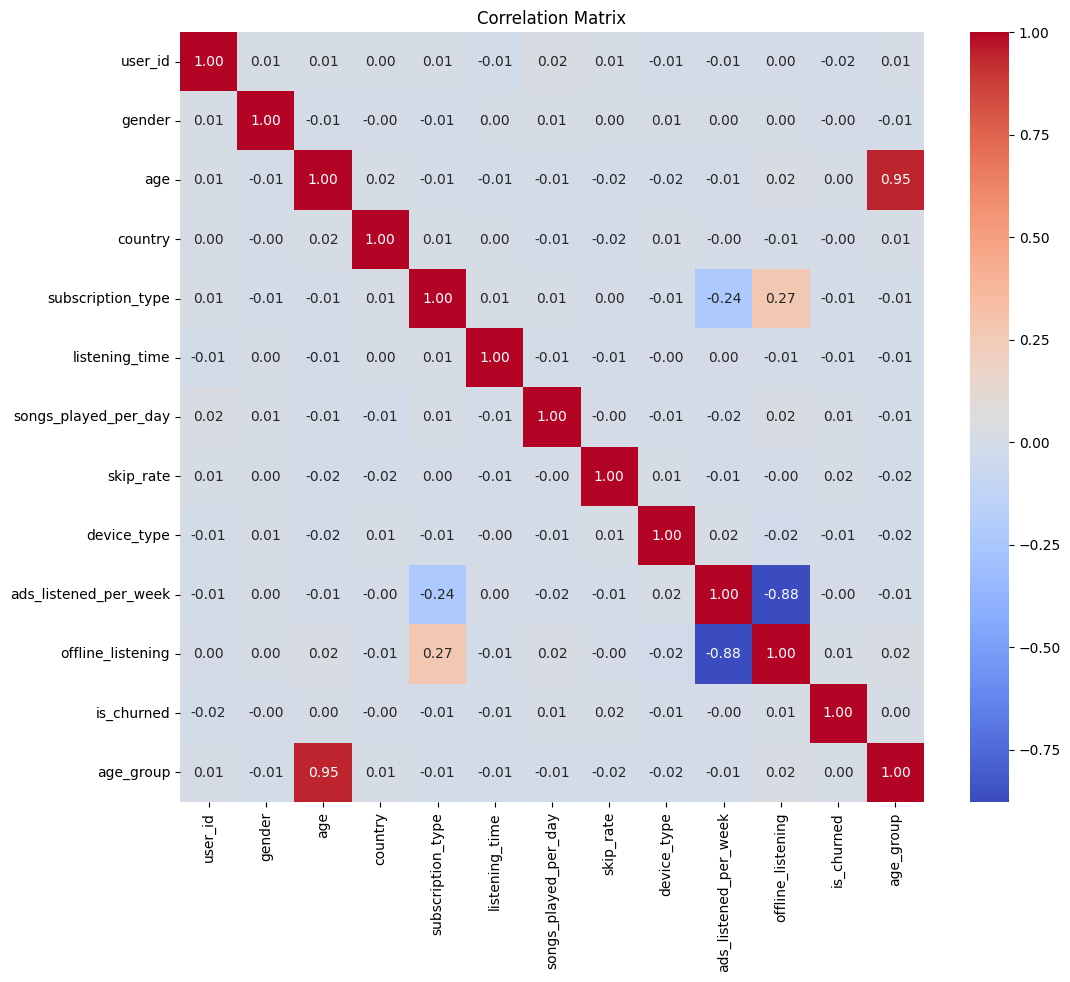

In [ ]:
correlation_matrix = df_mapped.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_mapped

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,age_group
0,1,0,54,1,1,26,23,0.20,0,31,0,1,3
1,2,2,33,2,0,141,62,0.34,2,0,1,0,2
2,3,1,38,0,2,199,38,0.04,1,0,1,1,2
3,4,0,22,1,3,36,2,0.31,1,0,1,0,1
4,5,2,29,7,0,250,57,0.36,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,2,44,2,3,237,36,0.30,1,0,1,1,2
7996,7997,1,34,0,2,61,64,0.59,1,0,1,0,2
7997,7998,0,17,7,1,81,62,0.33,0,5,0,0,0
7998,7999,0,34,4,3,245,94,0.27,0,0,1,0,2


In [ ]:
df_mapped = df_mapped.drop('user_id', axis=1)
display(df_mapped.head())

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,age_group
0,0,54,1,1,26,23,0.20,0,31,0,1,3
1,2,33,2,0,141,62,0.34,2,0,1,0,2
2,1,38,0,2,199,38,0.04,1,0,1,1,2
3,0,22,1,3,36,2,0.31,1,0,1,0,1
4,2,29,7,0,250,57,0.36,1,0,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_mapped.drop('is_churned',axis=1).values
y = df_mapped['is_churned'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(class_weight='balanced')

In [ ]:
# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.50125


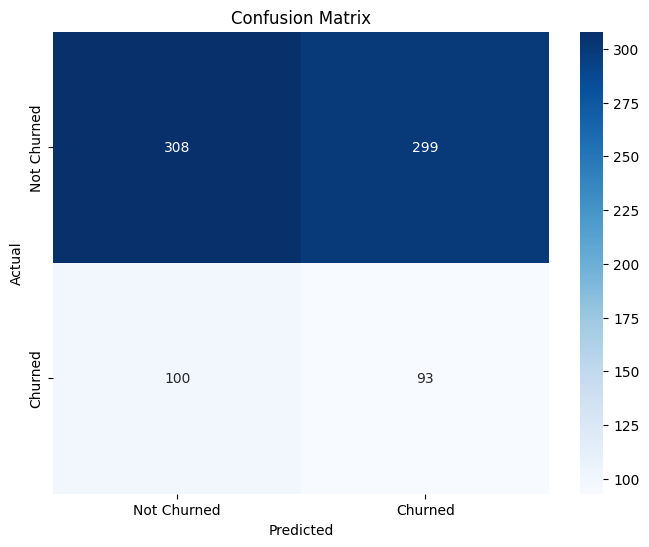

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df_mapped["is_churned"].value_counts()

,count
is_churned,
0,5929
1,2071
